In [1]:
import pandas as pd
df=pd.read_csv("electric_vehicles_dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_ID              3022 non-null   int64  
 1   Manufacturer            3022 non-null   object 
 2   Model                   3022 non-null   object 
 3   Year                    3022 non-null   int64  
 4   Battery_Type            3022 non-null   object 
 5   Battery_Capacity_kWh    3022 non-null   float64
 6   Range_km                3022 non-null   int64  
 7   Charging_Type           3022 non-null   object 
 8   Charge_Time_hr          3022 non-null   float64
 9   Price_USD               3022 non-null   float64
 10  Color                   3022 non-null   object 
 11  Country_of_Manufacture  3022 non-null   object 
 12  Autonomous_Level        2580 non-null   float64
 13  CO2_Emissions_g_per_km  2430 non-null   float64
 14  Safety_Rating           2685 non-null   

In [6]:
df.isnull().sum()  # numerical ko'rinishda tushub qolgan qiymatlar soni

Vehicle_ID                  0
Manufacturer                0
Model                       0
Year                        0
Battery_Type                0
Battery_Capacity_kWh        0
Range_km                    0
Charging_Type               0
Charge_Time_hr              0
Price_USD                   0
Color                       0
Country_of_Manufacture      0
Autonomous_Level          442
CO2_Emissions_g_per_km    592
Safety_Rating             337
Units_Sold_2024             0
Warranty_Years              0
dtype: int64

# Missing values funksiya usulida

In [7]:
def tozalash(df):
    for col in df.columns:
        if df[col].isnull().any():
            if  df[col].dtype=="object":
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
    return df


In [8]:
tozalash(df)

C:\Users\User\AppData\Local\Temp\ipykernel_22724\1386963027.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,Vehicle_ID,Manufacturer,Model,Year,Battery_Type,Battery_Capacity_kWh,Range_km,Charging_Type,Charge_Time_hr,Price_USD,Color,Country_of_Manufacture,Autonomous_Level,CO2_Emissions_g_per_km,Safety_Rating,Units_Sold_2024,Warranty_Years
0,1,Acura,ZDX (with GM Ultium),2015,Lithium-titanate,55.8,214,CHAdeMO,9.0,111203.94,Matte White,UK,0.00000,0.0,5.0,19726,3
1,2,Lamborghini,Revuelto (PHEV),2025,Lithium-titanate,90.8,212,Vehicle-to-Home (V2H),7.3,127131.65,White,Netherlands,2.00000,0.0,4.0,3349,3
2,3,NIO,ET7,2020,Calcium-ion,64.7,235,Level 2 Charging,8.9,94347.37,Beige,UK,5.00000,0.0,5.0,6300,5
3,4,Audi,e-tron,2025,Lithium-iron phosphate,120.5,140,Ultra-Fast Charging (350 kW+),10.5,75615.15,Sunset Orange,Argentina,2.00000,0.0,5.0,2339,5
4,5,Acura,ZDX (with GM Ultium),2023,Lithium-titanate,51.8,336,Plug-in Hydrogen Refueling,3.6,141046.94,Ice Silver,United Arab Emirates,2.00000,0.0,3.0,1051,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,3018,Ferrari,SF90 Stradale (PHEV),2018,Sodium-ion,49.9,182,Mobile Charging,11.7,43988.90,Champagne,Indonesia,2.00000,0.0,4.0,13366,5
3018,3019,Mahindra,Born Electric (upcoming range),2019,Lithium-ion,136.9,375,Vehicle-to-Home (V2H),5.8,142072.84,Electric Blue,India,2.51938,0.0,3.0,15235,3
3019,3020,Cadillac,Lyriq,2021,Lithium-iron phosphate,136.5,221,Plug-in Hydrogen Refueling,1.1,88218.53,Metallic Silver,Canada,2.00000,0.0,3.0,13808,3
3020,3021,Mahindra,XUV400,2021,Nickel-metal hydride,96.4,249,Mobile Charging,9.8,110221.30,Matte Green,New Zealand,3.00000,0.0,3.0,9854,3


# encoding qilish funksiya bilan

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:

def encodlash(df):
    encoder=LabelEncoder()
    for col in df.columns:
        if df[col].dtype=="object":
            if df[col].nunique()<=5:
                dummies=pd.get_dummies(df[col],prefix=col, dtype=int)
                df=pd.concat([df.drop(columns=col),dummies],axis=1)
            else:
                df[col]=encoder.fit_transform(df[col])
    return df



In [11]:
df=encodlash(df)

In [12]:
df["Autonomous_Level"].value_counts().nunique()

7

In [13]:
df.info() # to'ldirildi va encoding qilindi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_ID              3022 non-null   int64  
 1   Manufacturer            3022 non-null   int64  
 2   Model                   3022 non-null   int64  
 3   Year                    3022 non-null   int64  
 4   Battery_Type            3022 non-null   int64  
 5   Battery_Capacity_kWh    3022 non-null   float64
 6   Range_km                3022 non-null   int64  
 7   Charging_Type           3022 non-null   int64  
 8   Charge_Time_hr          3022 non-null   float64
 9   Price_USD               3022 non-null   float64
 10  Color                   3022 non-null   int64  
 11  Country_of_Manufacture  3022 non-null   int64  
 12  Autonomous_Level        3022 non-null   float64
 13  CO2_Emissions_g_per_km  3022 non-null   float64
 14  Safety_Rating           3022 non-null   

# matplotlib

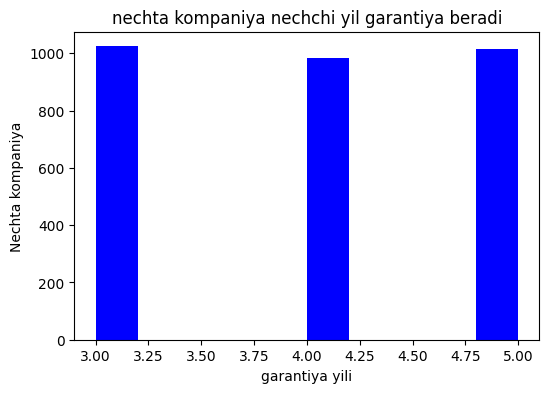

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(df["Warranty_Years"], color="blue") # figura turi line graph
plt.xlabel("garantiya yili")
plt.ylabel("Nechta kompaniya")
plt.title("nechta kompaniya nechchi yil garantiya beradi")
plt.show()

In [15]:
from  sklearn.preprocessing import MinMaxScaler
def scalinglash(df):
    scaler=MinMaxScaler()
    num_col=df.select_dtypes(include=["float64","int64"]).columns.drop("Price_USD")
    df[num_col]=scaler.fit_transform(df[num_col])
    return df

In [16]:
df=scalinglash(df)

In [17]:
df.head()

,Vehicle_ID,Manufacturer,Model,Year,Battery_Type,Battery_Capacity_kWh,Range_km,Charging_Type,Charge_Time_hr,Price_USD,Color,Country_of_Manufacture,Autonomous_Level,CO2_Emissions_g_per_km,Safety_Rating,Units_Sold_2024,Warranty_Years
0,0.000000,0.000000,0.888889,0.0,0.500000,0.275385,0.228,0.133333,0.739130,111203.94,0.555556,0.923077,0.0,0.0,1.0,0.986493,0.0
1,0.000331,0.442308,0.755556,1.0,0.500000,0.544615,0.224,0.933333,0.591304,127131.65,0.981481,0.538462,0.4,0.0,0.5,0.167234,0.0
2,0.000662,0.634615,0.183333,0.5,0.071429,0.343846,0.270,0.400000,0.730435,94347.37,0.018519,0.923077,1.0,0.0,1.0,0.314857,1.0
3,0.000993,0.019231,0.944444,1.0,0.357143,0.773077,0.080,0.800000,0.869565,75615.15,0.870370,0.000000,0.4,0.0,1.0,0.116708,1.0
4,0.001324,0.000000,0.888889,0.8,0.500000,0.244615,0.472,0.666667,0.269565,141046.94,0.425926,0.974359,0.4,0.0,0.0,0.052276,0.5


# Training

In [18]:
x=df.drop("Price_USD", axis=1)

In [19]:
y=df["Price_USD"]

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=42)

# Random Forest Regressor bilan training

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [23]:
rfr

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
rfr.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred=rfr.predict(x_test)

In [26]:
from sklearn.metrics import  r2_score, mean_absolute_error,mean_squared_error, root_mean_squared_error

In [27]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

In [28]:
print('r2:',r2)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)

r2: -0.04769443879693891
mae: 30355.602355567808
mse: 1234457316.1718917
rmse: 35134.844758044565


#  Decision Tree Regressor bilan training

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [30]:
dt.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [31]:
y_predict=dt.predict(x_test,)

In [32]:
from sklearn.metrics import  r2_score, mean_absolute_error,mean_squared_error, root_mean_squared_error

In [33]:
r_2=r2_score(y_test,y_predict)
m_ae=mean_absolute_error(y_test,y_predict)
m_se=mean_squared_error(y_test,y_predict)
r_mse=root_mean_squared_error(y_test,y_predict)

In [34]:
print('r2:',r_2)
print('mae:',m_ae)
print('mse:',m_se)
print('rmse:',r_mse)

r2: -1.2133887098516132
mae: 41915.97906284455
mse: 2607949212.316246
rmse: 51068.08408699357


#  Linear Regression bilan training

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [36]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_predi=lr.predict(x_test)

In [38]:
r_2_score=r2_score(y_test,y_predi)
m_a_e=mean_absolute_error(y_test,y_predi)
m_s_e=mean_squared_error(y_test,y_predi)
r_m_se=root_mean_squared_error(y_test,y_predi)

In [39]:
print('r2:',r_2_score)
print('mae:',m_a_e)
print('mse:',m_s_e)
print('rmse:',r_m_se)

r2: -0.017352618570777967
mae: 29965.486061490654
mse: 1198706737.971661
rmse: 34622.34448981844


In [40]:
print("RandomForestRegressor")
print('r2:',r2)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print(" ")
print("DecisionTreeRegressor")
print('r2:',r_2)
print('mae:',m_ae)
print('mse:',m_se)
print('rmse:',r_mse)
print(" ")
print("LinearRegression")
print('r2:',r_2_score)
print('mae:',m_a_e)
print('mse:',m_s_e)
print('rmse:',r_m_se)

RandomForestRegressor
r2: -0.04769443879693891
mae: 30355.602355567808
mse: 1234457316.1718917
rmse: 35134.844758044565
 
DecisionTreeRegressor
r2: -1.2133887098516132
mae: 41915.97906284455
mse: 2607949212.316246
rmse: 51068.08408699357
 
LinearRegression
r2: -0.017352618570777967
mae: 29965.486061490654
mse: 1198706737.971661
rmse: 34622.34448981844


# 

# Klib 

In [1]:
import klib

In [15]:
df=pd.read_csv("electric_vehicles_dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_ID              3022 non-null   int64  
 1   Manufacturer            3022 non-null   object 
 2   Model                   3022 non-null   object 
 3   Year                    3022 non-null   int64  
 4   Battery_Type            3022 non-null   object 
 5   Battery_Capacity_kWh    3022 non-null   float64
 6   Range_km                3022 non-null   int64  
 7   Charging_Type           3022 non-null   object 
 8   Charge_Time_hr          3022 non-null   float64
 9   Price_USD               3022 non-null   float64
 10  Color                   3022 non-null   object 
 11  Country_of_Manufacture  3022 non-null   object 
 12  Autonomous_Level        2580 non-null   float64
 13  CO2_Emissions_g_per_km  2430 non-null   float64
 14  Safety_Rating           2685 non-null   

GridSpec(6, 6)

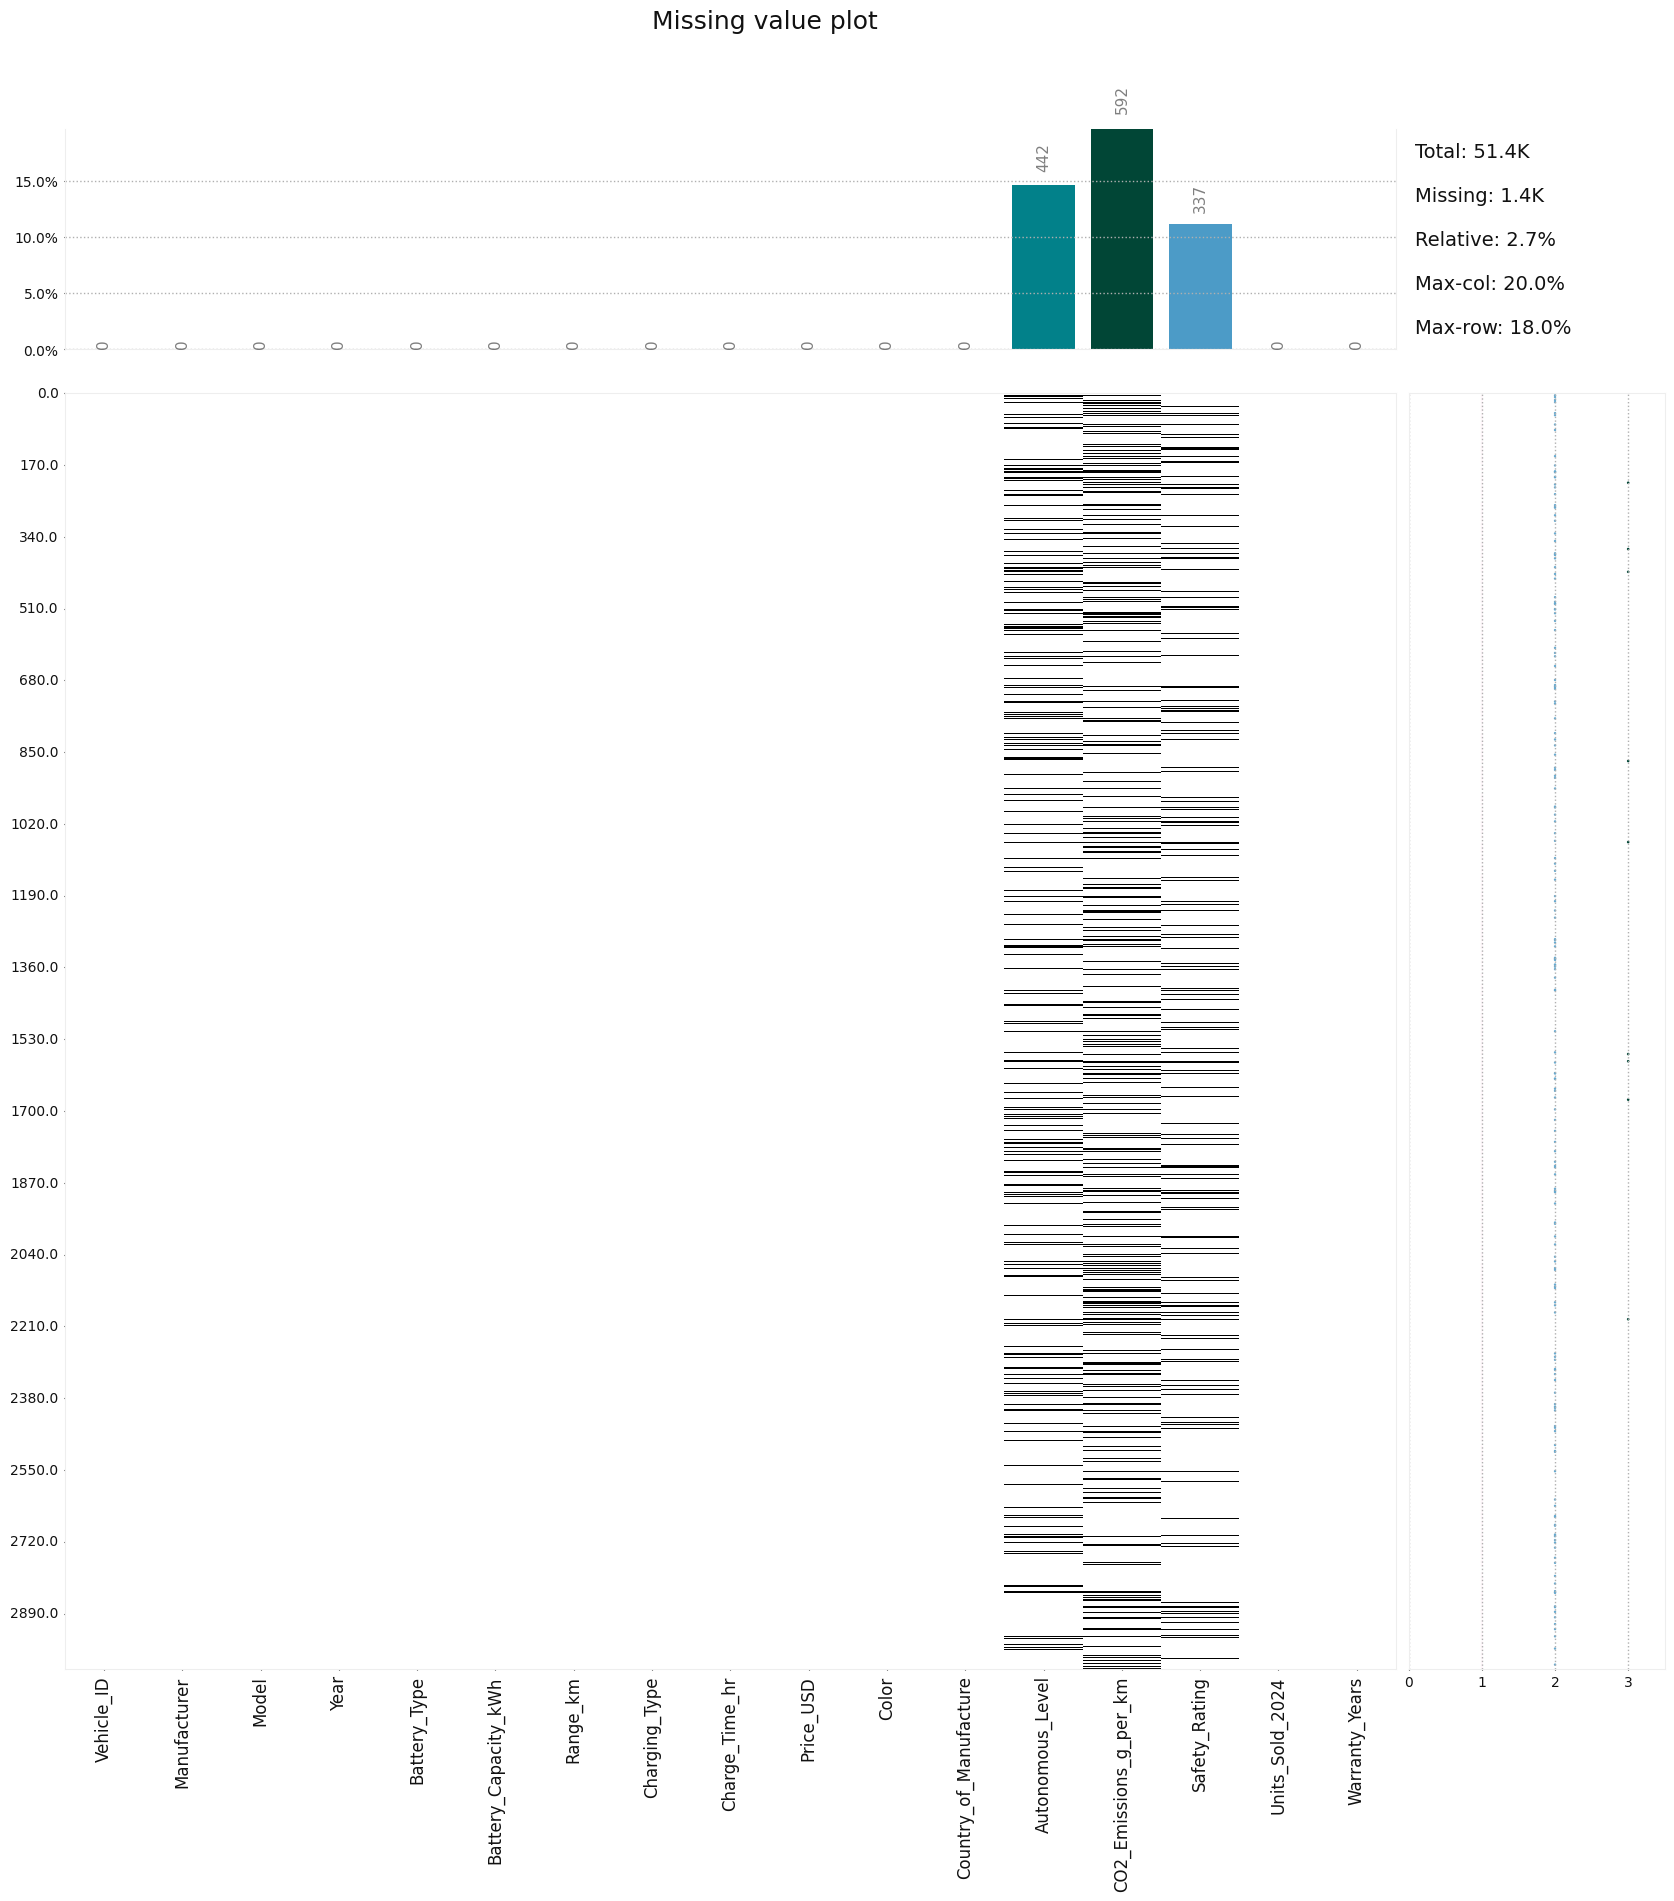

In [6]:
klib.missingval_plot(df)


In [7]:
klib.corr_interactive_plot(df, figsize=(10,6))

In [8]:
df=klib.data_cleaning(df, drop_duplicates=True)

Shape of cleaned data: (3022, 17) - Remaining NAs: 1371


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.24 MB (-61.54%)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   vehicle_id              3022 non-null   int16   
 1   manufacturer            3022 non-null   category
 2   model                   3022 non-null   string  
 3   year                    3022 non-null   int16   
 4   battery_type            3022 non-null   category
 5   battery_capacity_k_wh   3022 non-null   float32 
 6   range_km                3022 non-null   int16   
 7   charging_type           3022 non-null   category
 8   charge_time_hr          3022 non-null   float32 
 9   price_usd               3022 non-null   float64 
 10  color                   3022 non-null   category
 11  country_of_manufacture  3022 non-null   category
 12  autonomous_level        2580 non-null   float32 
 13  co2_emissions_g_per_km  2430 non-null   float32 
 14  safety_rating           

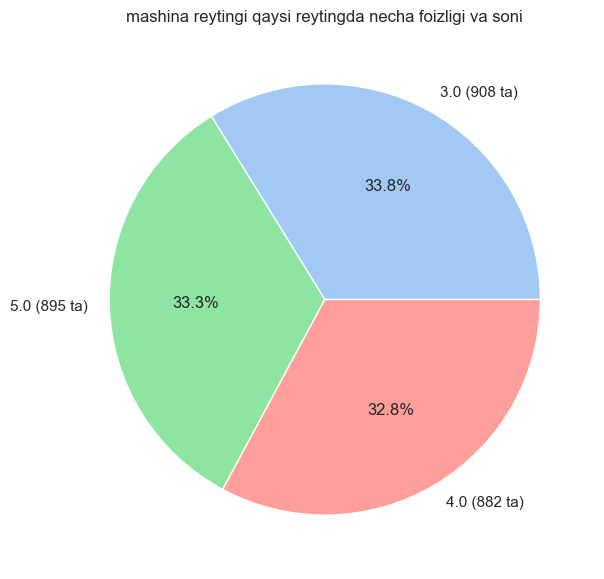

In [11]:
import seaborn as sb 
import matplotlib.pyplot as plt
sb.set(style="white")
counts=df["safety_rating"].value_counts()
labels=counts.index
values=counts.values
total=sum(values)
labels_with_counts = [f"{lab} ({val} ta)" 
                      for lab, val in zip(labels, values)]
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels_with_counts, autopct="%1.1f%%", startangle=0, colors=sb.color_palette("pastel6"))
plt.title("mashina reytingi qaysi reytingda necha foizligi va soni")
plt.show()

In [2]:
from  datacleaner import autoclean

In [3]:
df=autoclean(df)

c:\Users\User\anaconda3\envs\dars_7\lib\site-packages\datacleaner\datacleaner.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  input_dataframe[column].fillna(input_dataframe[column].median(), inplace=True)
c:\Users\User\anaconda3\envs\dars_7\lib\site-packages\datacleaner\datacleaner.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_ID              3022 non-null   int64  
 1   Manufacturer            3022 non-null   int64  
 2   Model                   3022 non-null   int64  
 3   Year                    3022 non-null   int64  
 4   Battery_Type            3022 non-null   int64  
 5   Battery_Capacity_kWh    3022 non-null   float64
 6   Range_km                3022 non-null   int64  
 7   Charging_Type           3022 non-null   int64  
 8   Charge_Time_hr          3022 non-null   float64
 9   Price_USD               3022 non-null   float64
 10  Color                   3022 non-null   int64  
 11  Country_of_Manufacture  3022 non-null   int64  
 12  Autonomous_Level        3022 non-null   float64
 13  CO2_Emissions_g_per_km  3022 non-null   float64
 14  Safety_Rating           3022 non-null   

# Klib + Datacleaner + Training 

In [5]:
x=df.drop("Price_USD", axis=1)

In [6]:
y=df["Price_USD"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# klib + datacleaner + RandomForestRegressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
random_fr=RandomForestRegressor()

In [15]:
random_fr.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_bashorat=random_fr.predict(x_test)

In [41]:
from sklearn.metrics import  r2_score, mean_absolute_error,mean_squared_error, root_mean_squared_error

In [14]:
r2=r2_score(y_test,y_bashorat)
mae=mean_absolute_error(y_test,y_bashorat)
mse=mean_squared_error(y_test,y_bashorat)
rmse=root_mean_squared_error(y_test,y_bashorat)

In [17]:
print('r2:',r2)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)

r2: -0.044051434643576304
mae: 30271.01821135612
mse: 1230164907.0844414
rmse: 35073.70677707792


# klib+datacleaner+DecisionTreeRegressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
d_tree_reg=DecisionTreeRegressor()

In [43]:
d_tree_reg.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [44]:
y_bash=d_tree_reg.predict(x_test)

In [45]:
r2_score=r2_score(y_test,y_bash)
m_absolut_e=mean_absolute_error(y_test,y_bash)
m_squared_e=mean_squared_error(y_test,y_bash)
r_m_squared_e=root_mean_squared_error(y_test, y_bash)

In [46]:
print(r2_score)
print(m_absolut_e)
print(m_squared_e)
print(r_m_squared_e)

-1.172853364947986
41176.058467475195
2560188003.2968554
50598.30039929064


# klib + datacleaner + LinearRegressor

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [33]:
lin_reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_bashorat2=lin_reg.predict(x_test)

In [37]:
r2_lin=r2_score(y_test,y_bashorat2)
mae_lin=mean_absolute_error(y_test,y_bashorat2)
mse_lin=mean_squared_error(y_test,y_bashorat2)
rmse_lin=root_mean_squared_error(y_test,y_bashorat2)

In [38]:
print(r2_lin)
print(mae_lin)
print(mse_lin)
print(rmse_lin)

-0.01795282399591569
29973.297713947293
1199413936.5124094
34632.556020490454


In [48]:
print("RandomForestRegressor")
print('r2:',r2)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print(" ")
print("DecisionTreeRegressor")
print("r2:",r2_score)
print("mae:",m_absolut_e)
print("mse:", m_squared_e)
print("rmse:",r_m_squared_e)
print(" ")
print("LinearRegression")
print("r2:",r2_lin)
print("mae:",mae_lin)
print("mse:",mse_lin)
print("rmse:",rmse_lin)


RandomForestRegressor
r2: -0.044051434643576304
mae: 30271.01821135612
mse: 1230164907.0844414
rmse: 35073.70677707792
 
DecisionTreeRegressor
r2: -1.172853364947986
mae: 41176.058467475195
mse: 2560188003.2968554
rmse: 50598.30039929064
 
LinearRegression
r2: -0.01795282399591569
mae: 29973.297713947293
mse: 1199413936.5124094
rmse: 34632.556020490454
